In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df_ROS = pd.read_csv('../../../dataset/RecurrenceOfSurgeryData.csv')
df_ROS.head(2)

,Unnamed: 0,입원기간,직업,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI,수술기법
0,0,2,자영업,10,1.0,0,0,0,60.3,66,163,16.1,12.3,2048.5,4,51.6,TELD
1,1,1,운동선수,10,1.0,0,0,0,71.7,47,171,13.7,6.4,1753.1,4,40.8,TELD


#### 데이터 전처리 
- 데이터의 갯수가 맞아야 함 
- 대상 컬럼 의한 레코드 삭제 시 데이터셋 양 고려

In [15]:
df_ROS_select = df_ROS[['입원기간','체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI','수술기법']]

In [16]:
df_ROS_select.isnull().sum()

입원기간           0
체중             0
연령             0
신장             0
전방디스크높이(mm)    0
후방디스크높이(mm)    0
디스크단면적         0
디스크위치          0
PI             0
수술기법           0
dtype: int64

### 상관관계 확인 
- 목표 변수 : '입원기간' -> 분포 : 언발란스
    - 연속형일 경우 : 정규화 확인
    - 범주형일 경우 : 밸런스 여부 확인 
- 설명 변수 : 
    - '체중' : 과/저체중이라고 입원기간이 길어지지 않아보임.
    - '연령' : 분포가 왼쪽으로 치우쳐져 있는 편임, 
    - '신장' : 다른 변수들의 비해 비교적 정규분포를 따름. 
    - 전방디스크높이: 정규분포를 따르는 듯하며, 
    - 후방디스크높이: 분포가 왼쪽으로 치우쳐져 값이 분포가 굉장히 좁음
    - 디스크단면적: 정규분포를 따르는 듯하며,
    - 디스크위치: 분포가 왼쪽으로 치우쳐져 값이 분포가 굉장히 좁음
    - PI : 분포가 왼쪽으로 치우쳐져 값이 분포가 굉장히 좁음
    - 수술기법: 압도적으로 'TELD'기법을 많이 사용하였으며, CDA를 통해 분석을 해야 함
- 분석 story : 재발 방지를 줄이기 위해서는 흡연을 피하고, 체중을 줄이는것이 우선임

#### 데이터 타입과 분포  
- 목표 변수 확인 
    - 데이터는 연속형이나, 압도적으로 '1'의 값이 많아 범주형으로 데이터를 쓰고자 함.

In [34]:
#%matplotlib tk
%matplotlib inline 

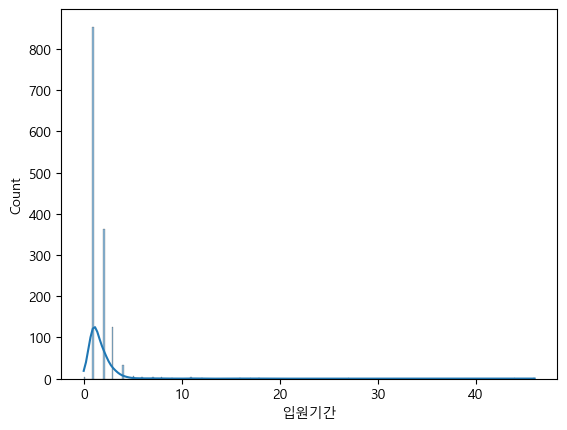

In [18]:
sns.histplot(data=df_ROS_select, x='입원기간',kde=True)
plt.show()

In [19]:
df_ROS_select['입원기간'].value_counts()

1     854
2     364
3     125
4      32
5       6
0       3
6       3
11      3
7       3
8       3
17      2
27      1
44      1
46      1
9       1
18      1
16      1
12      1
Name: 입원기간, dtype: int64

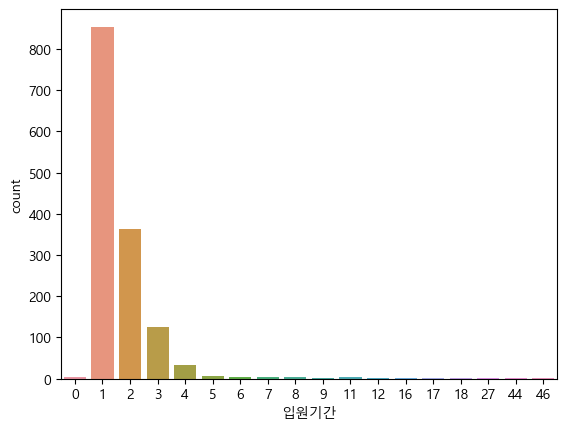

In [20]:
sns.countplot(data=df_ROS_select, x='입원기간')
plt.show()

In [21]:
df_ROS_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   입원기간         1405 non-null   int64  
 1   체중           1405 non-null   float64
 2   연령           1405 non-null   int64  
 3   신장           1405 non-null   int64  
 4   전방디스크높이(mm)  1405 non-null   float64
 5   후방디스크높이(mm)  1405 non-null   float64
 6   디스크단면적       1405 non-null   float64
 7   디스크위치        1405 non-null   int64  
 8   PI           1405 non-null   float64
 9   수술기법         1405 non-null   object 
dtypes: float64(5), int64(4), object(1)
memory usage: 109.9+ KB


#### 목표 변수와 각 설명 변수의 관계 확인

In [22]:
df_ROS.corr()
#  입원기간에 따라 선택한 설명변수가 크게 영향을 미치는 변수는 없어보임 (0에 가깝기 때문에)

C:\Users\02-19\AppData\Local\Temp\ipykernel_6632\388899935.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ROS.corr()


,Unnamed: 0,입원기간,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI
Unnamed: 0,1.000000,0.076036,0.067720,0.232173,0.018623,-0.035864,0.005337,0.030556,0.040181,0.037489,-0.131813,-0.048478,0.012138,0.096476,-0.022678
입원기간,0.076036,1.000000,0.065286,-0.006738,0.027090,0.072311,-0.015393,-0.047024,0.079106,-0.044577,-0.022702,-0.019827,0.007434,-0.003919,-0.004285
환자통증정도,0.067720,0.065286,1.000000,-0.064956,0.055789,-0.048016,-0.014930,0.033397,0.063743,0.040929,0.040804,-0.048167,-0.019568,-0.021931,0.004771
통증기간(월),0.232173,-0.006738,-0.064956,1.000000,0.003276,-0.004122,-0.017925,0.017828,0.050624,-0.001125,-0.020307,-0.017801,0.041602,0.022862,0.007433
당뇨여부,0.018623,0.027090,0.055789,0.003276,1.000000,0.070846,0.031640,0.040614,0.199835,-0.032815,0.038757,0.040557,0.029109,-0.034091,-0.006102
심혈관질환,-0.035864,0.072311,-0.048016,-0.004122,0.070846,1.000000,0.012787,-0.004563,0.157964,-0.045480,-0.002436,-0.019662,0.015346,-0.026488,0.018751
암발병여부,0.005337,-0.015393,-0.014930,-0.017925,0.031640,0.012787,1.000000,-0.021637,0.119165,-0.027325,-0.060715,-0.028960,-0.002971,-0.017652,0.020422
체중,0.030556,-0.047024,0.033397,0.017828,0.040614,-0.004563,-0.021637,1.000000,-0.109821,0.681335,0.060500,0.033339,0.203423,-0.004002,-0.014550
연령,0.040181,0.079106,0.063743,0.050624,0.199835,0.157964,0.119165,-0.109821,1.000000,-0.246746,0.119757,-0.007422,0.171296,-0.100640,0.025562
신장,0.037489,-0.044577,0.040929,-0.001125,-0.032815,-0.045480,-0.027325,0.681335,-0.246746,1.000000,0.069743,0.061521,0.185399,-0.010945,-0.025036


### 시각화 확인  
- '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI', '수술기법'

- 수술기법 : 'TELD'기법을 압도적으로 많이 사용했음을 확인함. 해당 기법을 사용하면 입원기간이 짧아지는지의 여부를 확인할 필요가 있음
- 그 외 다른 연속형 데이터들을 해당그래프를 통해 입원기간에 미치는 영향을 파악하기에는 미비함. 더 자세한 분석을 통해 입원기간에 미치는 영향을 확인해봐야 함.

In [23]:
 df_ROS_GB = df_ROS[['입원기간','체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI','수술기법']]

In [24]:
df_ROS_GB['입원기간'] = df_ROS_GB['입원기간'].astype(object )

C:\Users\02-19\AppData\Local\Temp\ipykernel_6632\2686006179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_GB['입원기간'] = df_ROS_GB['입원기간'].astype(object )


In [25]:
continous_list = df_ROS_select.describe().columns
continous_list

Index(['입원기간', '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적',
       '디스크위치', 'PI'],
      dtype='object')

In [26]:
pd.pivot_table(data= df_ROS, index='입원기간', columns= '연령', aggfunc='mean')

C:\Users\02-19\AppData\Local\Temp\ipykernel_6632\1085574555.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(data= df_ROS, index='입원기간', columns= '연령', aggfunc='mean')


PI                                                                    \
연령      15         16         17         18         19         20         21   
입원기간                                                                           
0      NaN        NaN        NaN        NaN        NaN        NaN        NaN   
1     46.2  41.566667  45.216667  45.200000  42.306250  44.915385  49.255000   
2      NaN  49.800000  45.140000  42.466667  53.283333  56.550000  44.636364   
3      NaN  67.500000  43.100000  31.100000  45.800000  49.042857  44.975000   
4      NaN        NaN        NaN  52.400000        NaN        NaN        NaN   
5      NaN        NaN        NaN        NaN        NaN        NaN        NaN   
6      NaN        NaN        NaN        NaN        NaN        NaN  47.200000   
7      NaN        NaN        NaN        NaN        NaN        NaN        NaN   
8      NaN        NaN        NaN        NaN        NaN        NaN        NaN   
9      NaN        NaN        NaN        NaN        NaN        NaN  42.700000   
11     NaN        NaN        NaN        NaN        NaN        NaN        NaN   
12     NaN        NaN        NaN        NaN        NaN        NaN        NaN   
16     NaN        NaN        NaN        NaN        NaN        NaN        NaN   
17     NaN        NaN        NaN        NaN  65.200000        NaN        NaN   
18     NaN        NaN        NaN        NaN        NaN        NaN        NaN   
27     NaN        NaN        NaN        NaN        NaN        NaN        NaN   
44     NaN        NaN        NaN        NaN        NaN        NaN        NaN   
46     NaN        NaN        NaN        NaN        NaN        NaN        NaN   

                                      ... 후방디스크높이(mm)                         \
연령          22         23         24  ...          74    75    76   77    78   
입원기간                                  ...                                      
0          NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
1     46.90625  43.921053  42.600000  ...         9.7  10.3  6.20  8.7  6.95   
2     42.53000  48.200000  47.957143  ...         6.7   NaN  6.15  6.3   NaN   
3     43.55000  33.000000        NaN  ...         NaN   8.8  3.40  NaN   NaN   
4          NaN  33.300000        NaN  ...         NaN   NaN   NaN  NaN   NaN   
5          NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
6          NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
7          NaN  36.100000        NaN  ...         NaN   NaN   NaN  NaN   NaN   
8          NaN        NaN        NaN  ...         NaN  10.1   NaN  NaN   NaN   
9          NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
11         NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
12         NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
16         NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
17         NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
18         NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
27         NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
44         NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   
46         NaN        NaN        NaN  ...         NaN   NaN   NaN  NaN   NaN   

                                   
연령       79   80   82     84   86  
입원기간                               
0       NaN  NaN  NaN    NaN  NaN  
1     6.495  3.3  NaN  6.755  5.5  
2     8.500  NaN  NaN    NaN  NaN  
3       NaN  NaN  NaN    NaN  NaN  
4       NaN  NaN  NaN    NaN  NaN  
5       NaN  NaN  NaN    NaN  NaN  
6       NaN  NaN  NaN    NaN  NaN  
7       NaN  NaN  NaN    NaN  NaN  
8       NaN  NaN  NaN    NaN  NaN  
9       NaN  NaN  NaN    NaN  NaN  
11      NaN  NaN  NaN    NaN  NaN  
12      NaN  NaN  NaN    NaN  NaN  
16      NaN  NaN  NaN    NaN  NaN  
17      NaN  NaN  NaN    NaN  NaN  
18      NaN  NaN  NaN    NaN  NaN 

In [27]:
df_ROS['디스크위치'].value_counts()

4     1059
5      217
3       89
2       19
45       9
34       7
11       2
23       1
10       1
35       1
Name: 디스크위치, dtype: int64

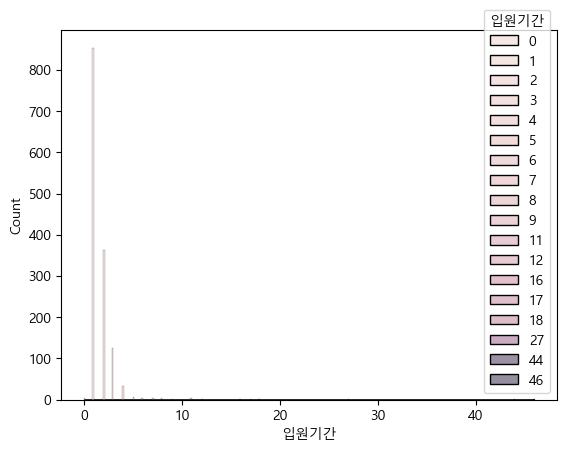

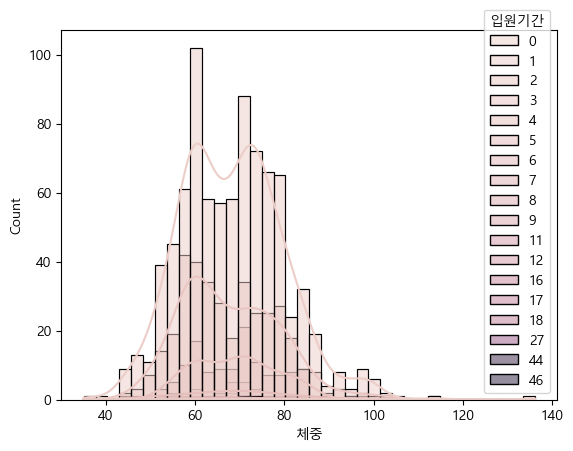

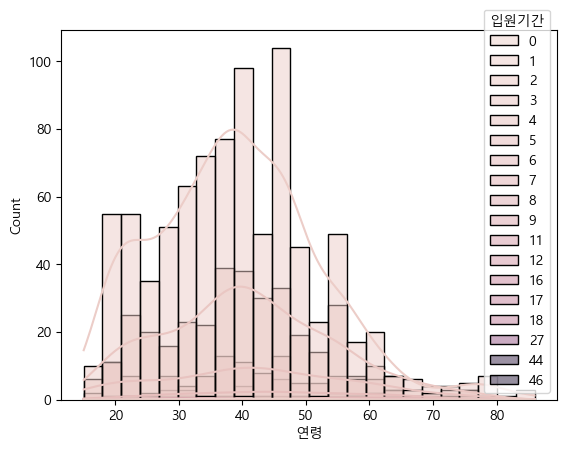

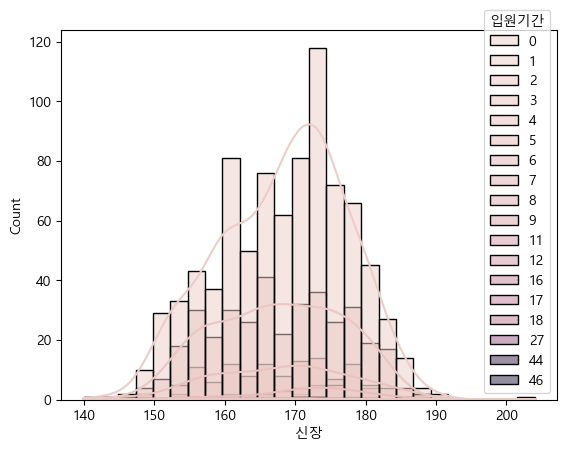

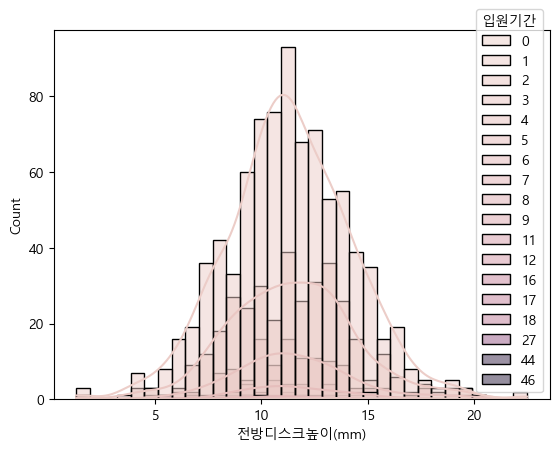

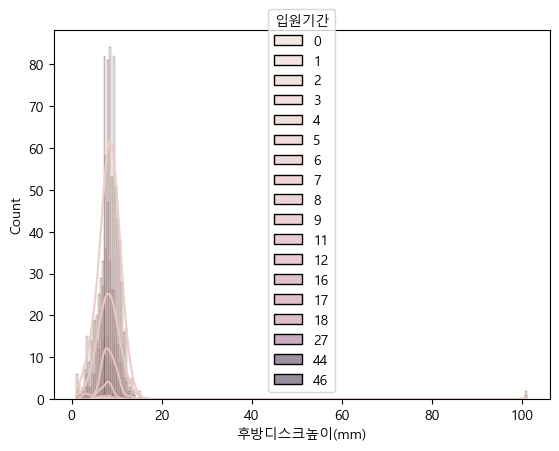

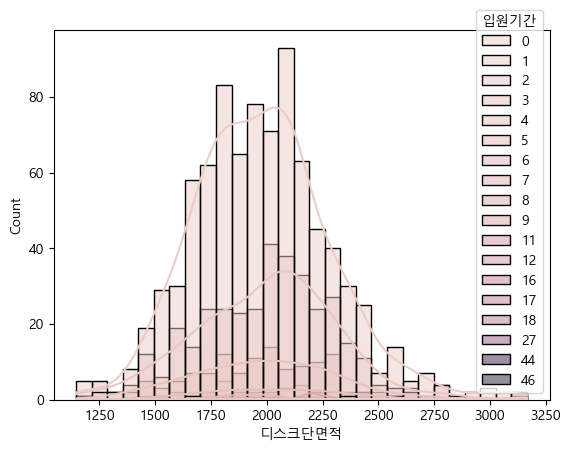

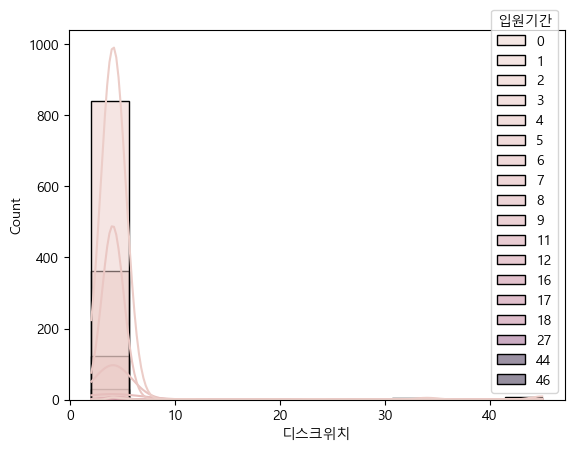

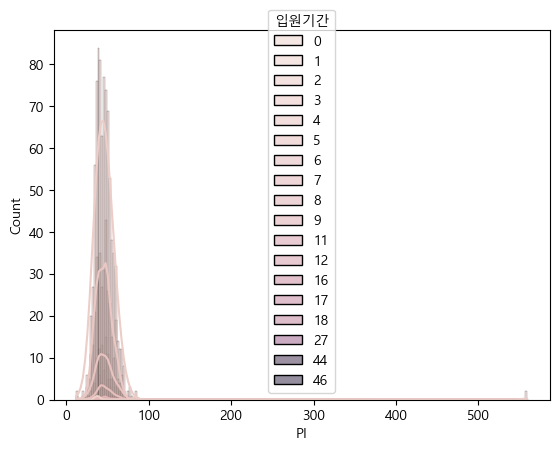

In [28]:
## for문을 사용해서 histplot 그래프 

for  continous in continous_list : 
    sns.histplot(data=df_ROS_GB, x=continous, kde=True, hue='입원기간') # 연속형 histplot그래프 사용  #hue='입원기간'
    plt.show()

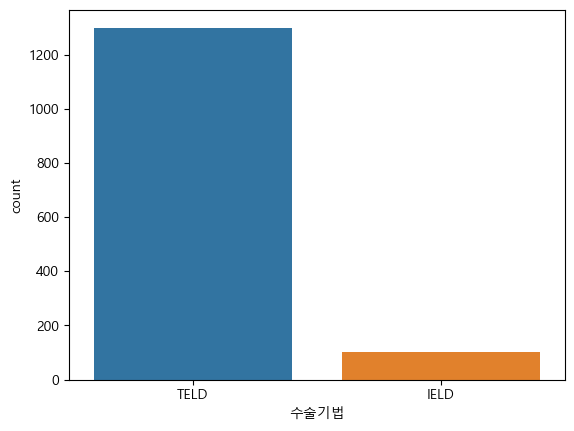

In [29]:
sns.countplot(data=df_ROS, x='수술기법')
plt.show()

# 압도적으로 'TELD'기법을 많이 사용함

#### 연속형/범주형

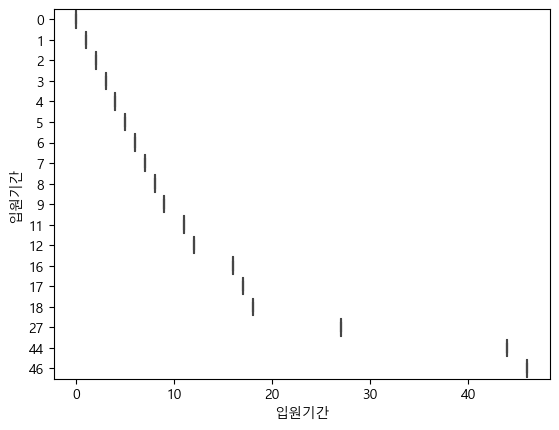

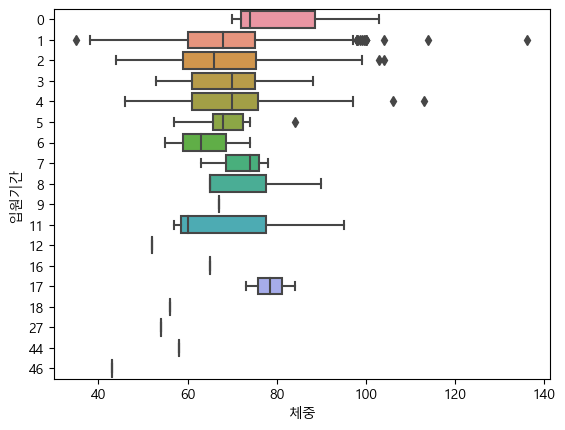

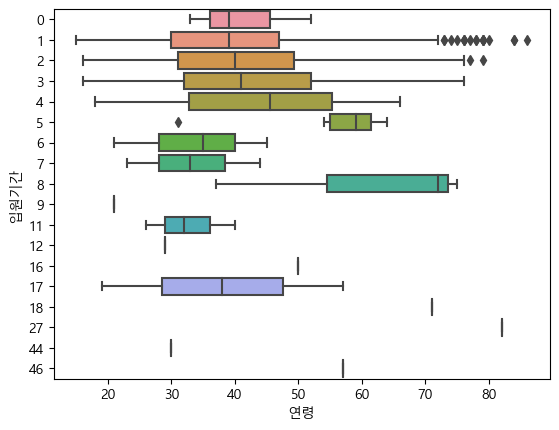

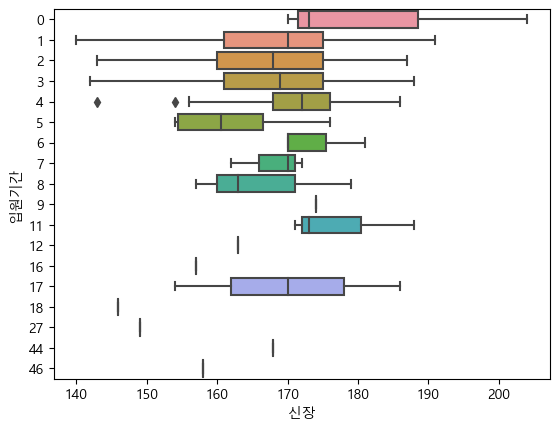

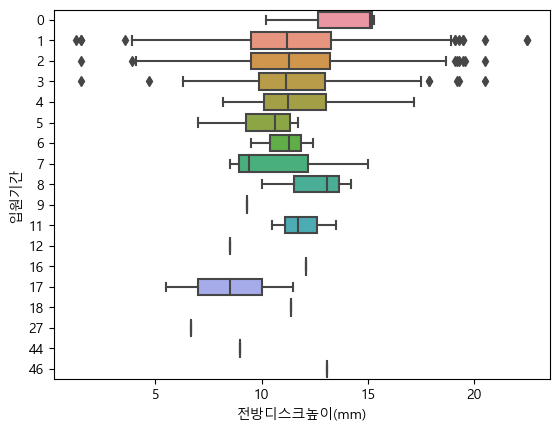

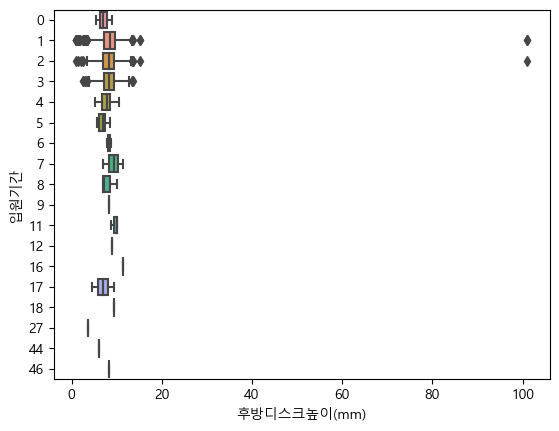

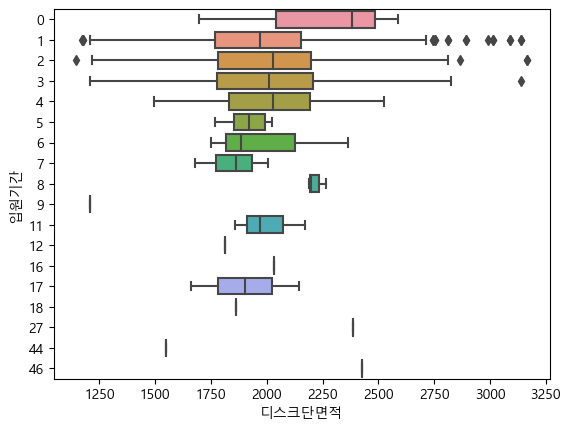

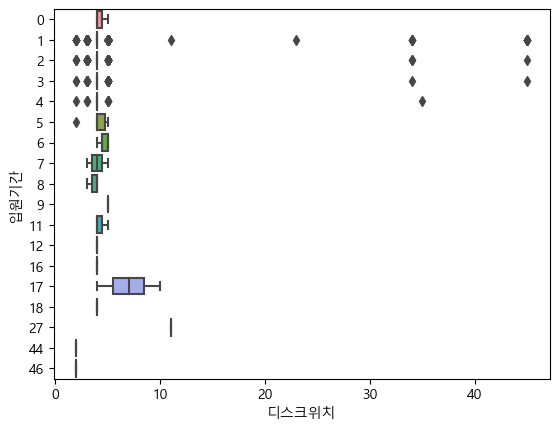

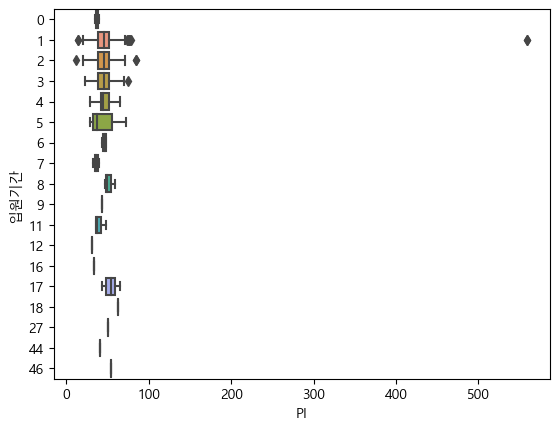

In [30]:
for item in continous_list :
    sns.boxplot(data=df_ROS_select, x=item, y='입원기간', orient='h') # orient='h'목표변수 y에 위치하게끔
    plt.show()

#### 범주형/범주형

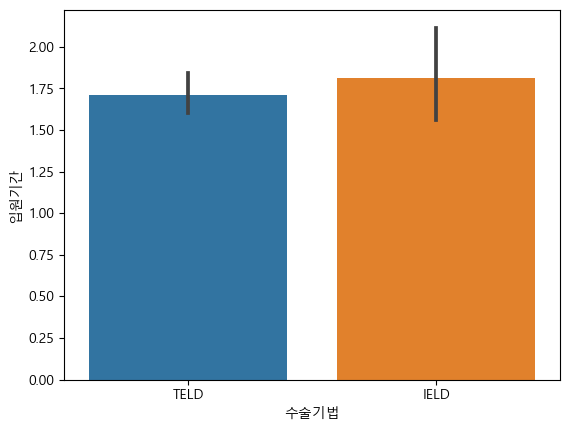

In [35]:
sns.barplot(data=df_ROS_GB, x='수술기법', y='입원기간')
plt.show()

## 수술기법에 따라 입원기간의 차이가 나지 않음을 확인할수 있음.